In [2]:
# Wine Quality Comparison: Red vs White
# Save this as wine_comparison.ipynb

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.feature_selection import VarianceThreshold

In [ ]:
# -------------------------------------------------
# 1. Load Data
# -------------------------------------------------

red = pd.read_csv('winequality-red.csv', sep=";")
white = pd.read_csv('winequality-white.csv', sep=";")

red["type"] = "red"
white["type"] = "white"

df = pd.concat([red, white], axis=0).reset_index(drop=True)
print("Combined shape:", df.shape)
df.head()

Combined shape: (6497, 13)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [7]:
# -------------------------------------------------
# 2. Data Cleaning
# -------------------------------------------------
print("\nMissing values:\n", df.isnull().sum())

# Outlier check with Z-scores
from scipy.stats import zscore
z_scores = np.abs(zscore(df.drop(["quality", "type"], axis=1)))
outliers = (z_scores > 3).sum()
print("\nOutliers per feature:\n", outliers)


Missing values:
 fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
type                    0
dtype: int64

Outliers per feature:
 541


In [8]:
# Scale features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df.drop(["quality", "type"], axis=1))
df_scaled = pd.DataFrame(scaled_features, columns=df.columns[:-2])
df_scaled["quality"] = df["quality"]
df_scaled["type"] = df["type"]

In [9]:
# -------------------------------------------------
# 3. Feature Analysis
# -------------------------------------------------
# Low variance
selector = VarianceThreshold(threshold=0.01)
selector.fit(df_scaled.drop(["quality", "type"], axis=1))
low_variance = [col for col, keep in zip(df_scaled.columns[:-2], selector.get_support()) if not keep]
print("\nLow variance features:", low_variance)


Low variance features: []


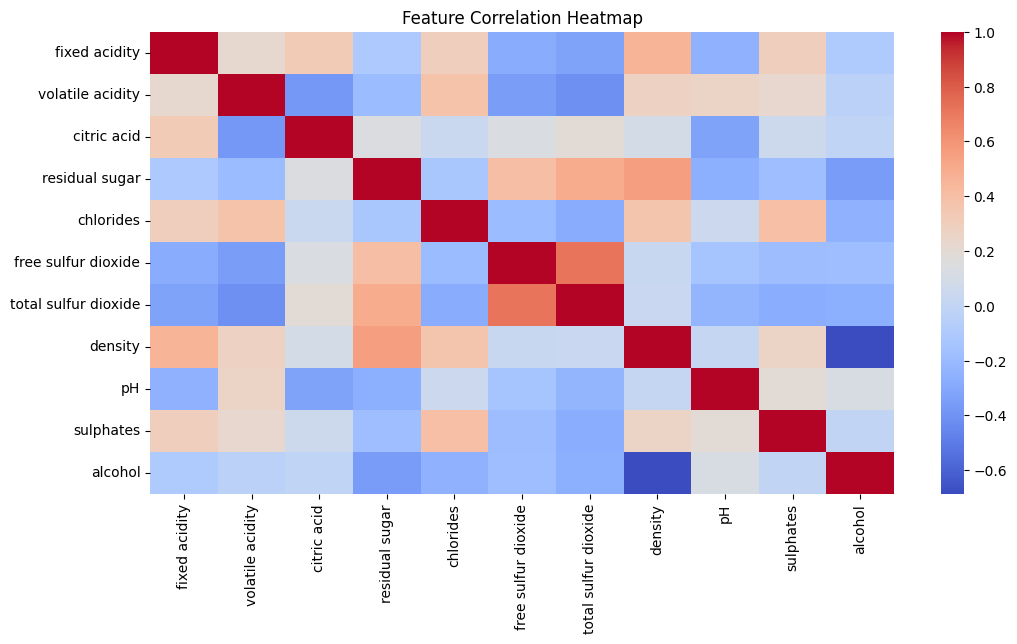

In [10]:
# Correlation heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(df_scaled.drop(["quality", "type"], axis=1).corr(), cmap="coolwarm", annot=False)
plt.title("Feature Correlation Heatmap")
plt.show()

In [12]:
# -------------------------------------------------
# 4. Dimensionality Reduction
# -------------------------------------------------
# PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_scaled.drop(["quality", "type"], axis=1))

df_pca = pd.DataFrame(pca_result, columns=["PC1", "PC2"])
df_pca["type"] = df_scaled["type"]
df_pca["quality"] = df_scaled["quality"]

# t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
tsne_result = tsne.fit_transform(df_scaled.drop(["quality", "type"], axis=1))

df_tsne = pd.DataFrame(tsne_result, columns=["Dim1", "Dim2"])
df_tsne["type"] = df_scaled["type"]
df_tsne["quality"] = df_scaled["quality"]

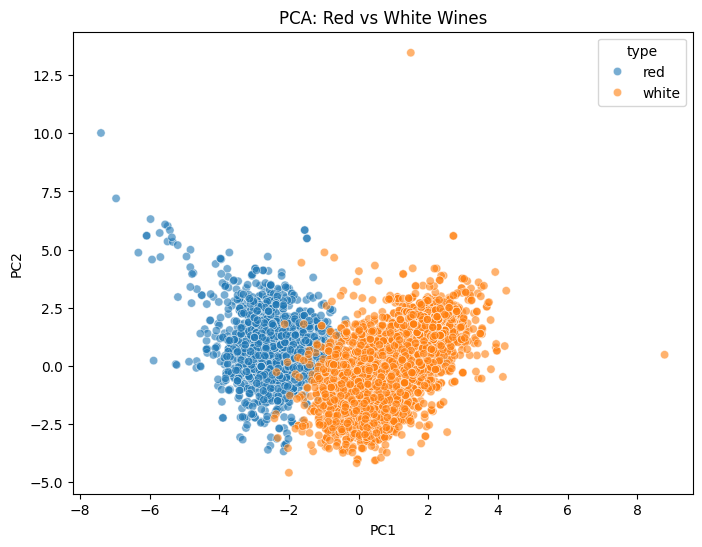

In [13]:
# -------------------------------------------------
# 5. Visualization
# -------------------------------------------------
# PCA by type
plt.figure(figsize=(8,6))
sns.scatterplot(data=df_pca, x="PC1", y="PC2", hue="type", alpha=0.6)
plt.title("PCA: Red vs White Wines")
plt.show()

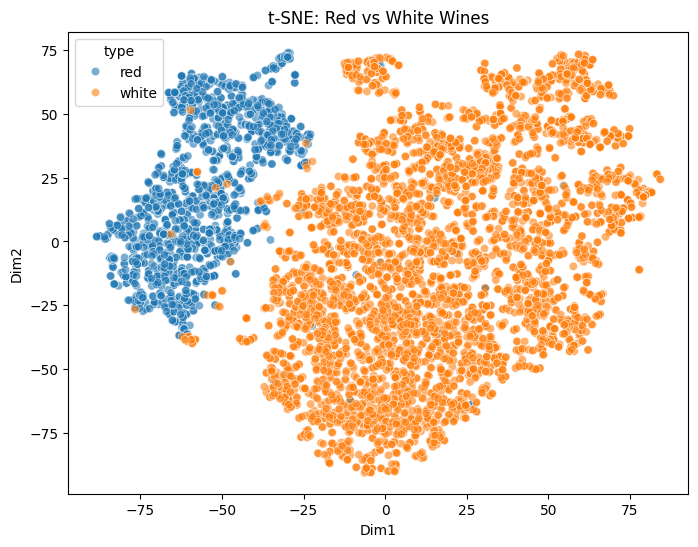

In [14]:
# t-SNE by type
plt.figure(figsize=(8,6))
sns.scatterplot(data=df_tsne, x="Dim1", y="Dim2", hue="type", alpha=0.6)
plt.title("t-SNE: Red vs White Wines")
plt.show()

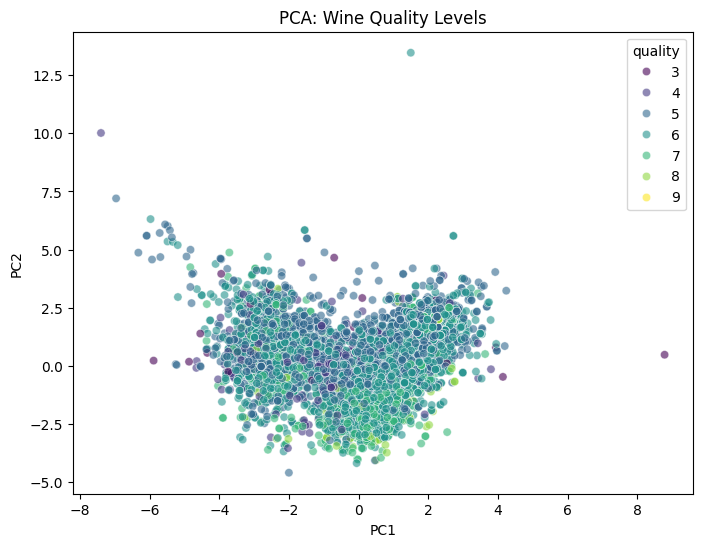

In [15]:
# PCA by quality
plt.figure(figsize=(8,6))
sns.scatterplot(data=df_pca, x="PC1", y="PC2", hue="quality", palette="viridis", alpha=0.6)
plt.title("PCA: Wine Quality Levels")
plt.show()

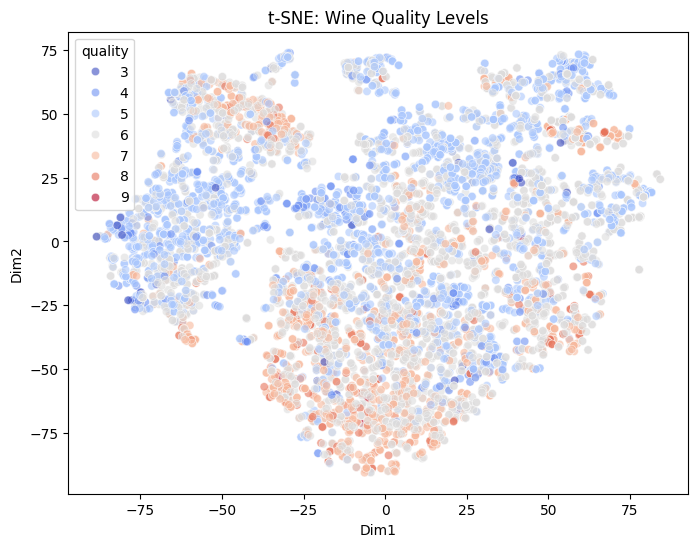

In [16]:
# t-SNE by quality
plt.figure(figsize=(8,6))
sns.scatterplot(data=df_tsne, x="Dim1", y="Dim2", hue="quality", palette="coolwarm", alpha=0.6)
plt.title("t-SNE: Wine Quality Levels")
plt.show()


In [17]:
# -------------------------------------------------
# 6. Reflection Helpers
# -------------------------------------------------
print("\nExplained variance by PCA components:", pca.explained_variance_ratio_)
print("Total variance explained by first 2 PCs:", sum(pca.explained_variance_ratio_))

print("\nReflection Points:")
print("- PCA shows broad separation between red and white wines.")
print("- t-SNE gives stronger clustering, clearer type separation.")
print("- Trade-off: PCA is interpretable (variance explained), t-SNE is visually powerful but harder to interpret.")



Explained variance by PCA components: [0.2754426  0.22671146]
Total variance explained by first 2 PCs: 0.5021540614343581

Reflection Points:
- PCA shows broad separation between red and white wines.
- t-SNE gives stronger clustering, clearer type separation.
- Trade-off: PCA is interpretable (variance explained), t-SNE is visually powerful but harder to interpret.
